# Music & Mental Health | Trying to predict music effects
_______________________________________

## Data Analysis

## Data Transformation / Data Visualisation / Feature Engineering

* What **aggregations** to do?
* What **plots** to visualize? 
* What **models** for machine learning?

## Trying to discover trends / predict music effects:

1) What is the connection between mental health and music use?
2) What is the connection between mental health and music preference?
3) What is the connection between mental health and music genres?
4) What is the connection between mental health and music effects?
5) What is the connection between mental health and age?
6) Can I make helpful recommendations based on these findings?


In [1]:
# Load libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats


In [2]:
# Read cleaned dataset
# data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned1.csv')
# Remove the Unnamed Column: 
data_mmh = pd.read_csv('../../data/cleaned/data_mmh_cleaned2.csv', index_col=0)


In [3]:
data_mmh.head()


,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [4]:
data_mmh.shape

(616, 31)

In [11]:
labels = ["<10", "10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's"]
data_mmh['Age group'] = pd.cut(data_mmh['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels = labels)


In [45]:
data.shape

(616, 32)

In [44]:
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Favorite genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age group
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,10's
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.,60's
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,10's
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.,10's
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.,10's


_________

### 1) Connection disease and music use:
* Positive test results:
	* 'Music effects' and 'While working'
	* 'Music effects' and 'Exploratory'
### 2) Connection disease and music preference:
### 3) Connection disease and music genres:
### 4) Connection disease and greatest music effects:
* Positive test results:
	* ‘Music effects’  and ‘Depression’
### 5) Connections disease and age:
* Positive test results:
	* ‘Age group’  and ‘Music effects’

### 6) Can I make helpful recommendations based on these findings?

________

### 1) Connection disease and music use:
* Positive test results:
	* 'Music effects' and 'While working'
	* 'Music effects' and 'Exploratory'

'Music effects' and 'While working':

In [5]:
# 'Music effects'(c) and 'While working'(c) #LogisticRegression #DecisionTrees, #Random Forest, #Neural Networks

In [6]:
# Mussic effects (c) and 'While working' (c)

musiceffects_ww = pd.crosstab(data_mmh['Music effects'], data_mmh['While working'])
musiceffects_ww

While working,No,Yes
Music effects,,
Improve,79,387
No effect,42,93
Worsen,5,10


In [7]:
# Test for checking relationship between categorical and categorical # Chi2

from scipy import stats

# Create a contingency table (cross-tabulation)
musiceffects_ww = pd.crosstab(data_mmh['Music effects'], data_mmh['While working'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_ww)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square statistic: 14.463517496650542
P-value: 0.0007232477331809323


* **p-value** (typically **< 0.05**) suggests that there is a **significant association** between the two categorical variables.

* If the p-value is less than your chosen significance level, you can **reject the null hypothesis** and **conclude** that there is a **significant association between the two categorical variables**.

We reject H0

* Significant association
* **Use column for model**

<Axes: xlabel='While working', ylabel='Music effects'>

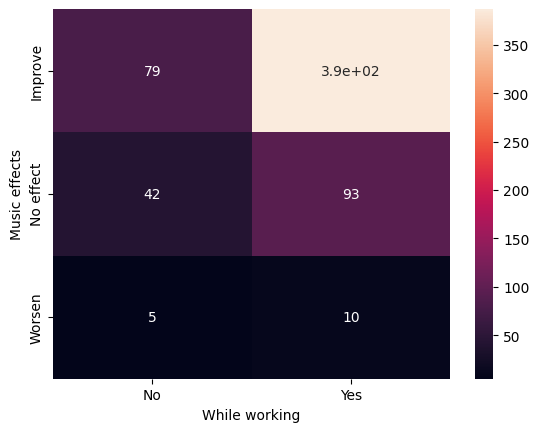

In [8]:
sns.heatmap(musiceffects_ww, annot=True)

'Music effects' and 'Exploratory':

In [ ]:
# 'Music effects'(c) and 'Exploratory'(c) #LogisticRegression #DecisionTrees, #Random Forest, #Neural Networks

In [36]:
musiceffects_e = pd.crosstab(data_mmh['Music effects'], data_mmh['Exploratory'])
musiceffects_e 

Exploratory,No,Yes
Music effects,,
Improve,107,359
No effect,52,83
Worsen,6,9


In [ ]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_e = pd.crosstab(data_mmh['Music effects'], data_mmh['Exploratory'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_e)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

* **p-value** (typically **< 0.05**) suggests that there is a **significant association** between the two categorical variables.

* If the p-value is less than your chosen significance level, you can **reject the null hypothesis** and **conclude** that there is a **significant association between the two categorical variables**.

We reject H0

* Significant association
* **Use column for model**

<Axes: xlabel='Exploratory', ylabel='Music effects'>

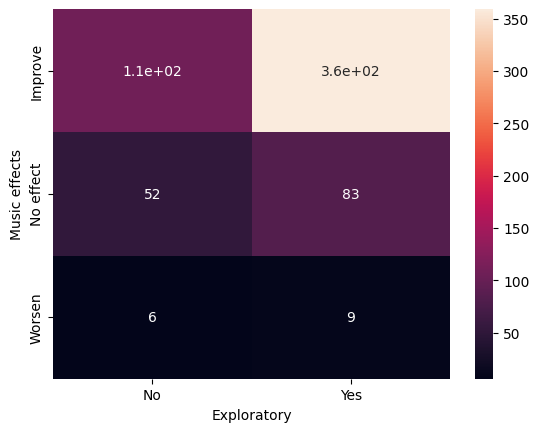

In [37]:
sns.heatmap(musiceffects_e, annot=True)

### 2) Connection disease and music preference:

There is no connection 

### 3) Connection disease and music genres:

There is no connection 

### 4) Connection disease and greatest music effects:
* Positive test results:
	* ‘Music effects’  and ‘Depression’

In [ ]:
# * ‘Music effects’ (c) and ‘Depression’ (n) #RandomForest

In [38]:
# Get average 'Depression' (numerical) for every possible music effect 
data_mmh.groupby(['Music effects']).agg({'Depression': 'mean'})

,Depression
Music effects,
Improve,4.957082
No effect,4.422222
Worsen,7.200000


In [ ]:
#* Null Hypothesis (H0): The means of all groups are equal.
#* Alternative Hypothesis (H1): At least one group's mean is different from the others.

#f_oneway() function takes the group data as input
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between 'Music effects' and 'Hours per day'
# Assumption (H0) is that Hours per day and Music effects are NOT correlated

# Finds out 'Hours per day' for each 'Music effect' as a list
MusicEffects_Depression = data_mmh.groupby('Music effects') ['Depression'].apply(list)

# Performing the ANOVA test
AnovaResults = f_oneway(*MusicEffects_Depression)
print('P-Value for Anova is:', AnovaResults[1])

#We accept the H0 only when P-Value > 0.05

* If the **p-value is less < than** your chosen significance level (e.g., "**0.05**), you can reject the null hypothesis and conclude that there are significant differences between the groups.

* If the p-value is greater > than the significance level, you fail to reject the null hypothesis, suggesting no significant differences among the groups.

**We reject H0**

* (H0): The means of all groups are not equal.
* (H0): Difference, relation -> **use it in your model**

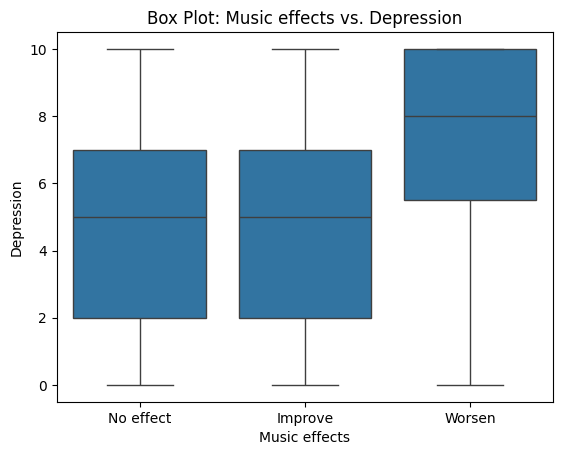

In [43]:
# Boxplot #categorical vs. numerical
# Sample data
data = data_mmh

# Create a box plot
sns.boxplot(data=data_mmh, x='Music effects', y='Depression')

# Add labels and a title
plt.xlabel('Music effects')
plt.ylabel('Depression')
plt.title('Box Plot: Music effects vs. Depression')

# Show the plot
plt.show()

### 5) Connections disease and age:
* Positive test results:
	* ‘Age group’  and ‘Music effects’

In [ ]:
# ‘Age group’ (c) and ‘Music effects’ (c) #LogisticRegression #DecisionTrees, #Random Forest, #Neural Networks

In [ ]:
#df['age_group'] = pd.cut(df['age'], 3)
labels = ["<10", "10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's"]
data_mmh['Age group'] = pd.cut(data_mmh['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels = labels)
#data_mmh['Age group'] = pd.cut(data_mmh['Age'], 9)
#data_mmh
data_mmh[['Age','Age group']]

In [ ]:
data_mmh['Age group'].value_counts()

<Axes: xlabel='Age group', ylabel='count'>

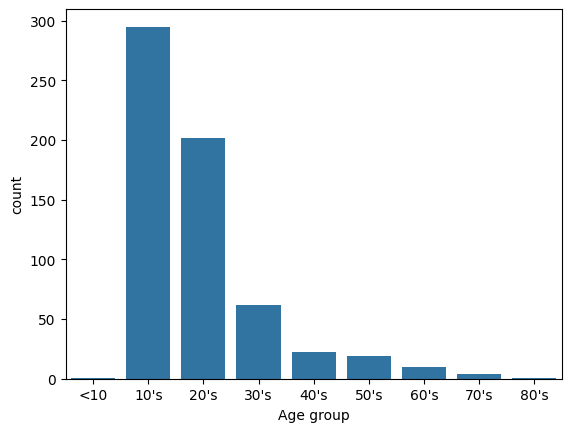

In [39]:
sns.countplot(data=data_mmh, x="Age group")

In [40]:
musiceffects_age = pd.crosstab(data_mmh['Age group'], data_mmh['Music effects']) #categorical vs. categorical
musiceffects_age

Music effects,Improve,No effect,Worsen
Age group,,,
<10,1,0,0
10's,239,50,6
20's,147,51,4
30's,38,19,5
40's,17,5,0
50's,11,8,0
60's,9,1,0
70's,4,0,0
80's,0,1,0


In [ ]:
# Test for checking relationship between categorical and categorical # Chi2

# Create a contingency table (cross-tabulation)
musiceffects_age = pd.crosstab(data_mmh['Age group'], data_mmh['Music effects'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(musiceffects_age)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

* **p-value** (typically **< 0.05**) suggests that there is a **significant association** between the two categorical variables.

* If the p-value is less than your chosen significance level, you can **reject the null hypothesis** and **conclude** that there is a **significant association between the two categorical variables**.

We reject H0

* Significant association
* **Use column for model**

<Axes: xlabel='Music effects', ylabel='Age group'>

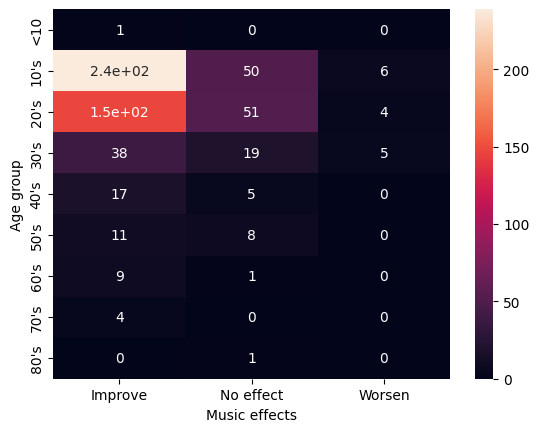

In [41]:
sns.heatmap(musiceffects_age, annot=True)

### 6) Can I make helpful recommendations based on these findings?

_______